In [1]:
from __future__ import print_function
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as k 
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#load mnist dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data() #everytime loading data won't be so easy :)

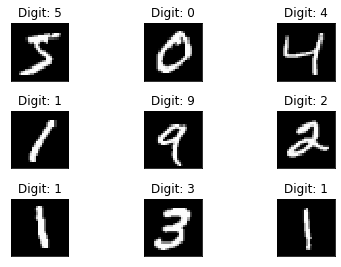

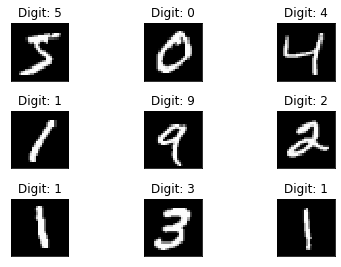

In [3]:
#visualising first 9 data from training dataset
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [4]:
# let's print the actual data shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [5]:
#input image size 28*28
img_rows , img_cols = 28, 28

In [6]:
#reshaping
#this assumes our data format
#For 3D data, "channels_last" assumes (conv_dim1, conv_dim2, conv_dim3, channels) while 
#"channels_first" assumes (channels, conv_dim1, conv_dim2, conv_dim3).
if k.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
#more reshaping
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [7]:
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


In [8]:
#set number of categories
num_category = 10

In [9]:
# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_category)
y_test = to_categorical(y_test, num_category)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [10]:
##model building
model = Sequential()
#convolutional layer with rectified linear unit activation
model.add(Conv2D(32, kernel_size=(7,7), strides=(2,2),
                 activation='relu',
                 input_shape=input_shape))
#32 convolution filters used each of size 5x5
#again
model.add(Conv2D(64, (7,7), strides=(2,2), activation='relu'))
#64 convolution filters used each of size 3x3
#choose the best features via pooling
model.add(AveragePooling2D(pool_size=(2, 2)))
#randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))
#flatten since too many dimensions, we only want a classification output
model.add(Flatten())
#fully connected to get all relevant data
model.add(Dense(128, activation='relu'))
#one more dropout for convergence' sake :) 
model.add(Dropout(0.5))
#output a softmax to squash the matrix into output probabilities
model.add(Dense(num_category, activation='softmax'))
#Adaptive learning rate (adaDelta) is a popular form of gradient descent rivaled only by adam and adagrad
#categorical ce since we have multiple classes (10) 
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=optimizers.Adam(),
              metrics=['accuracy'])

In [11]:
batch_size = 32
num_epoch = 10
#model training
model_log = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.4044 - accuracy: 0.8733 - val_loss: 0.0886 - val_accuracy: 0.9754
Epoch 2/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1475 - accuracy: 0.9581 - val_loss: 0.0691 - val_accuracy: 0.9777
Epoch 3/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1092 - accuracy: 0.9692 - val_loss: 0.0600 - val_accuracy: 0.9834
Epoch 4/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0922 - accuracy: 0.9737 - val_loss: 0.0610 - val_accuracy: 0.9826
Epoch 5/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0784 - accuracy: 0.9775 - val_loss: 0.0527 - val_accuracy: 0.9845
Epoch 6/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0697 - accuracy: 0.9794 - val_loss: 0.0459 - val_accuracy: 0.9873
Epoch 7/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0640 - accuracy: 0.9811 - val_loss: 0.0494 -

In [12]:
#how well did it do? 
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.046014606952667236
Test accuracy: 0.9879999756813049


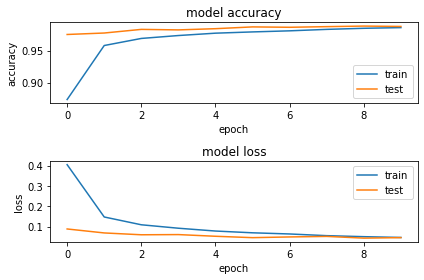

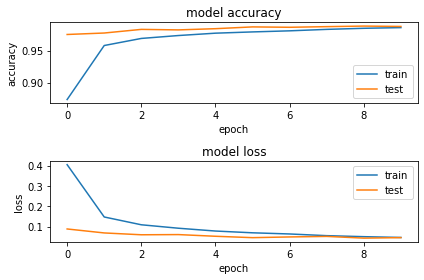

In [13]:
import os
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig